# Merged Savant and FanGraphs 2018 Analysis -xFIP

In this notebook, I'll do a similar analysis with xFIP and SIERA that I did with xwOBA with the hitting data. Again the focus of this project is to find potential "breakout" players for 2018 so will mostly be using 2017 data and then running the same analysis on 2015 and 2016 data to see if what I came up with were "breakouts" in 2016 and 2017.

xFIP - is a statistic that estimates a pitcher's expected run prevention independent of the performance of their defense.

SIERA - skill interactive ERA, similar to xFIP

To get my final datasets using the MLB Statcast data and the FanGraphs data, I took out players who had thrown under 250 pitches in 2017, then sorted by name and reindexed the datasets and then merged them.

In [207]:
import pandas as pd
import numpy as np
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None
%matplotlib inline
pd.set_option("display.max_rows",500)

In [208]:
# read in merged pitching
merged_pitching_2015 = pd.read_csv("C:/Users/avitosky/Documents/Baseball Project/merged_pitching_2015.csv", index_col=0)
merged_pitching_2016 = pd.read_csv("C:/Users/avitosky/Documents/Baseball Project/merged_pitching_2016.csv", index_col=0)
merged_pitching_2017 = pd.read_csv("C:/Users/avitosky/Documents/Baseball Project/merged_pitching_2017.csv", index_col=0)

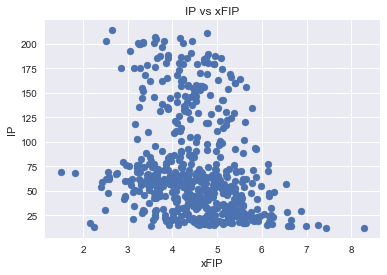

In [209]:
# plot scatter plot of IP vs xFIP to get a sense of innings pitched vs xFIP, not much to take from this chart
plt.scatter(merged_pitching_2017['xFIP'], merged_pitching_2017['IP'])
plt.title('IP vs xFIP')
plt.xlabel('xFIP')
plt.ylabel('IP')

plt.show()

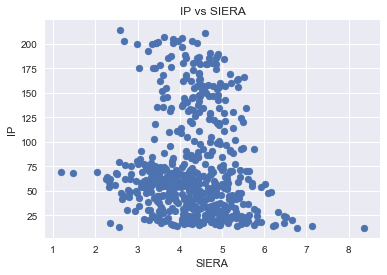

In [210]:
# SIERA looks pretty similar
plt.scatter(merged_pitching_2017['SIERA'], merged_pitching_2017['IP'])
plt.title('IP vs SIERA')
plt.xlabel('SIERA')
plt.ylabel('IP')

plt.show()

In [211]:
# let's remind ourselves of what our data looks like
merged_pitching_2017.head()

,Player_Name,Total_Pitches,IP,W,L,SV,G,GS,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,xFIP,SIERA,WAR,BA,ISO,SLG,wOBA,xwOBA,xBA,Hits,ABs,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Swings,Release_Extension,SwingsperAB
0,A.J. Cole,937,52.0,3,5,0,11,8,7.62,4.67,1.38,0.293,0.831,0.440,0.167,0.393,0.136,1.50,3.81,5.20,5.21,5.12,0.1,0.338,0.232,0.570,0.378,0.367,0.322,51,151,86.2,12.6,2082,89.6,89.77,155,6.49,1.026490
1,A.J. Griffin,1322,77.1,6,6,0,18,15,7.10,3.26,2.33,0.251,0.707,0.285,0.132,0.583,0.142,1.34,5.94,6.26,6.14,5.30,-0.1,0.318,0.343,0.661,0.404,0.351,0.280,76,239,86.5,23.4,2261,80.4,80.58,243,6.59,1.016736
2,A.J. Schugel,496,32.0,4,0,0,32,0,7.59,3.94,0.84,0.304,0.907,0.527,0.194,0.280,0.115,1.41,1.97,4.00,4.23,4.28,0.1,0.333,0.172,0.505,0.354,0.330,0.293,31,93,87.8,7.0,2050,88.1,86.59,95,5.45,1.021505
3,AJ Ramos,1104,58.2,2,4,27,61,0,11.05,5.22,1.07,0.294,0.771,0.401,0.204,0.395,0.121,1.41,3.99,4.10,4.30,4.01,0.4,0.331,0.209,0.541,0.369,0.345,0.299,49,148,84.9,12.7,2238,86.0,84.84,150,5.65,1.013514
4,Aaron Bummer,374,22.0,1,3,0,30,0,6.95,6.14,1.64,0.167,0.769,0.544,0.140,0.316,0.222,1.27,4.50,6.16,5.25,5.42,-0.5,0.232,0.250,0.482,0.290,0.315,0.276,13,56,86.0,3.6,1940,89.8,89.23,58,5.93,1.035714


In [212]:
# taking out counting stats and creating datasets with just rate stats for deeper analysis, keep Total_Pitches as a ref point
# most interested in how xFIP and SIERA correlate with each other

rate_pitching_stats_2015 = merged_pitching_2015.filter(['Player_Name', 'Total_Pitches', 'xFIP', 'SIERA', 'Kper9', 'BBper9', 
                                                        'HRper9', 'BABIP', 'LOBperc', 'GBperc', 'LDperc', 'FBperc', 'HRperFB',
                                                        'WHIP', 'ERA', 'FIP',  'BA', 'xBA', 'ISO', 'SLG', 'wOBA', 'xwOBA', 
                                                        'Launch_Speed', 'Launch_Angle', 'Spin_Rate', 'Velocity', 
                                                        'Effective_Speed', 'Release_Extension', 'SwingsperAB'], axis=1)
rate_pitching_stats_2016 = merged_pitching_2016.filter(['Player_Name', 'Total_Pitches', 'xFIP', 'SIERA', 'Kper9', 'BBper9', 
                                                        'HRper9', 'BABIP', 'LOBperc', 'GBperc', 'LDperc', 'FBperc', 'HRperFB',
                                                        'WHIP', 'ERA', 'FIP',  'BA', 'xBA', 'ISO', 'SLG', 'wOBA', 'xwOBA', 
                                                        'Launch_Speed', 'Launch_Angle', 'Spin_Rate', 'Velocity', 
                                                        'Effective_Speed', 'Release_Extension', 'SwingsperAB'], axis=1)
rate_pitching_stats_2017 = merged_pitching_2017.filter(['Player_Name', 'Total_Pitches', 'xFIP', 'SIERA', 'Kper9', 'BBper9', 
                                                        'HRper9', 'BABIP', 'LOBperc', 'GBperc', 'LDperc', 'FBperc', 'HRperFB',
                                                        'WHIP', 'ERA', 'FIP',  'BA', 'xBA', 'ISO', 'SLG', 'wOBA', 'xwOBA', 
                                                        'Launch_Speed', 'Launch_Angle', 'Spin_Rate', 'Velocity', 
                                                        'Effective_Speed', 'Release_Extension', 'SwingsperAB'], axis=1)

In [213]:
# let's look at rate_pitching_stats and see what we're working with
rate_pitching_stats_2017.head()

,Player_Name,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
0,A.J. Cole,937,5.21,5.12,7.62,4.67,1.38,0.293,0.831,0.440,0.167,0.393,0.136,1.50,3.81,5.20,0.338,0.322,0.232,0.570,0.378,0.367,86.2,12.6,2082,89.6,89.77,6.49,1.026490
1,A.J. Griffin,1322,6.14,5.30,7.10,3.26,2.33,0.251,0.707,0.285,0.132,0.583,0.142,1.34,5.94,6.26,0.318,0.280,0.343,0.661,0.404,0.351,86.5,23.4,2261,80.4,80.58,6.59,1.016736
2,A.J. Schugel,496,4.23,4.28,7.59,3.94,0.84,0.304,0.907,0.527,0.194,0.280,0.115,1.41,1.97,4.00,0.333,0.293,0.172,0.505,0.354,0.330,87.8,7.0,2050,88.1,86.59,5.45,1.021505
3,AJ Ramos,1104,4.30,4.01,11.05,5.22,1.07,0.294,0.771,0.401,0.204,0.395,0.121,1.41,3.99,4.10,0.331,0.299,0.209,0.541,0.369,0.345,84.9,12.7,2238,86.0,84.84,5.65,1.013514
4,Aaron Bummer,374,5.25,5.42,6.95,6.14,1.64,0.167,0.769,0.544,0.140,0.316,0.222,1.27,4.50,6.16,0.232,0.276,0.250,0.482,0.290,0.315,86.0,3.6,1940,89.8,89.23,5.93,1.035714


In [214]:
# a look at correlation between all rate stats, sorted by xFIP
rate_pitching_stats_2017.corr().sort_values(by='xFIP', ascending=False)

,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
xFIP,-0.209061,1.000000,0.925270,-0.683702,0.508508,0.435224,-0.046931,-0.265907,-0.309989,-0.095417,0.348254,0.110750,0.611782,0.540402,0.788296,0.073788,0.073931,0.334595,0.276885,0.201103,0.226713,0.173926,0.269968,-0.182961,-0.245462,-0.252962,-0.077636,0.114619
SIERA,-0.050325,0.925270,1.000000,-0.772239,0.528380,0.322891,0.011124,-0.300921,-0.092959,0.036121,0.076490,0.126702,0.645151,0.517159,0.735207,0.081494,0.145194,0.212696,0.191039,0.148381,0.204118,0.110867,0.024851,-0.235621,-0.244172,-0.251272,-0.086031,0.109486
FIP,-0.188117,0.788296,0.735207,-0.502323,0.435381,0.848212,0.029794,-0.243725,-0.195199,-0.085997,0.230757,0.672532,0.666195,0.710451,1.000000,0.294223,0.310481,0.730974,0.663179,0.555164,0.508494,0.285245,0.138575,-0.205944,-0.264379,-0.261713,-0.037964,0.024556
WHIP,-0.196803,0.611782,0.645151,-0.337427,0.608862,0.423507,0.663517,-0.489119,0.001477,0.259589,-0.113608,0.365970,1.000000,0.807311,0.666195,0.738667,0.490519,0.391807,0.609784,0.692359,0.456920,0.234143,-0.117484,-0.147805,-0.113135,-0.114121,-0.023919,0.152741
ERA,-0.185517,0.540402,0.517159,-0.286890,0.351218,0.623611,0.505058,-0.741925,-0.167250,0.221944,0.070182,0.511441,0.807311,1.000000,0.710451,0.665397,0.522811,0.614637,0.740498,0.749994,0.577842,0.343846,0.052874,-0.152704,-0.170978,-0.167628,-0.019792,0.127846
BBper9,-0.238306,0.508508,0.528380,-0.001513,1.000000,0.102785,0.068186,-0.121887,0.023672,-0.040531,-0.005928,0.117884,0.608862,0.351218,0.435381,0.116346,-0.021779,0.135869,0.150271,0.137703,0.006732,-0.030249,-0.057635,0.057040,0.148137,0.135745,-0.002703,0.096338
HRper9,-0.112858,0.435224,0.322891,-0.145027,0.102785,1.000000,0.047803,-0.134874,-0.370047,-0.085185,0.403792,0.817774,0.423507,0.623611,0.848212,0.380600,0.382839,0.923064,0.841387,0.715136,0.644520,0.382912,0.323879,-0.123045,-0.257907,-0.244767,0.011059,-0.050084
FBperc,-0.091645,0.348254,0.076490,0.187928,-0.005928,0.403792,-0.286236,0.127788,-0.906185,-0.236351,1.000000,-0.050947,-0.113608,0.070182,0.230757,-0.098469,-0.138276,0.454900,0.289315,0.147932,0.187929,0.240410,0.935820,0.125578,-0.118320,-0.111827,0.027299,0.003901
ISO,-0.090601,0.334595,0.212696,0.036812,0.135869,0.923064,0.106645,-0.168872,-0.439041,-0.044816,0.454900,0.758541,0.391807,0.614637,0.730974,0.428432,0.404022,1.000000,0.918488,0.783163,0.671988,0.428223,0.377762,-0.068831,-0.180958,-0.170075,0.019115,-0.040120
SLG,-0.092481,0.276885,0.191039,0.060263,0.150271,0.841387,0.486005,-0.312889,-0.356361,0.148703,0.289315,0.726006,0.609784,0.740498,0.663179,0.750799,0.580660,0.918488,1.000000,0.962664,0.743253,0.449990,0.255236,-0.079670,-0.165586,-0.154470,0.021923,0.049687


In [215]:
# a look at correlation between all rate stats, sorted by SIERA
rate_pitching_stats_2017.corr().sort_values(by='SIERA', ascending=False)

,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
SIERA,-0.050325,0.925270,1.000000,-0.772239,0.528380,0.322891,0.011124,-0.300921,-0.092959,0.036121,0.076490,0.126702,0.645151,0.517159,0.735207,0.081494,0.145194,0.212696,0.191039,0.148381,0.204118,0.110867,0.024851,-0.235621,-0.244172,-0.251272,-0.086031,0.109486
xFIP,-0.209061,1.000000,0.925270,-0.683702,0.508508,0.435224,-0.046931,-0.265907,-0.309989,-0.095417,0.348254,0.110750,0.611782,0.540402,0.788296,0.073788,0.073931,0.334595,0.276885,0.201103,0.226713,0.173926,0.269968,-0.182961,-0.245462,-0.252962,-0.077636,0.114619
FIP,-0.188117,0.788296,0.735207,-0.502323,0.435381,0.848212,0.029794,-0.243725,-0.195199,-0.085997,0.230757,0.672532,0.666195,0.710451,1.000000,0.294223,0.310481,0.730974,0.663179,0.555164,0.508494,0.285245,0.138575,-0.205944,-0.264379,-0.261713,-0.037964,0.024556
WHIP,-0.196803,0.611782,0.645151,-0.337427,0.608862,0.423507,0.663517,-0.489119,0.001477,0.259589,-0.113608,0.365970,1.000000,0.807311,0.666195,0.738667,0.490519,0.391807,0.609784,0.692359,0.456920,0.234143,-0.117484,-0.147805,-0.113135,-0.114121,-0.023919,0.152741
BBper9,-0.238306,0.508508,0.528380,-0.001513,1.000000,0.102785,0.068186,-0.121887,0.023672,-0.040531,-0.005928,0.117884,0.608862,0.351218,0.435381,0.116346,-0.021779,0.135869,0.150271,0.137703,0.006732,-0.030249,-0.057635,0.057040,0.148137,0.135745,-0.002703,0.096338
ERA,-0.185517,0.540402,0.517159,-0.286890,0.351218,0.623611,0.505058,-0.741925,-0.167250,0.221944,0.070182,0.511441,0.807311,1.000000,0.710451,0.665397,0.522811,0.614637,0.740498,0.749994,0.577842,0.343846,0.052874,-0.152704,-0.170978,-0.167628,-0.019792,0.127846
HRper9,-0.112858,0.435224,0.322891,-0.145027,0.102785,1.000000,0.047803,-0.134874,-0.370047,-0.085185,0.403792,0.817774,0.423507,0.623611,0.848212,0.380600,0.382839,0.923064,0.841387,0.715136,0.644520,0.382912,0.323879,-0.123045,-0.257907,-0.244767,0.011059,-0.050084
ISO,-0.090601,0.334595,0.212696,0.036812,0.135869,0.923064,0.106645,-0.168872,-0.439041,-0.044816,0.454900,0.758541,0.391807,0.614637,0.730974,0.428432,0.404022,1.000000,0.918488,0.783163,0.671988,0.428223,0.377762,-0.068831,-0.180958,-0.170075,0.019115,-0.040120
xwOBA,-0.018589,0.226713,0.204118,-0.059218,0.006732,0.644520,0.395534,-0.266461,-0.346447,0.361149,0.187929,0.533132,0.456920,0.577842,0.508494,0.575974,0.898764,0.671988,0.743253,0.734905,1.000000,0.651355,0.211087,-0.078243,-0.160683,-0.149417,0.019738,-0.095396
SLG,-0.092481,0.276885,0.191039,0.060263,0.150271,0.841387,0.486005,-0.312889,-0.356361,0.148703,0.289315,0.726006,0.609784,0.740498,0.663179,0.750799,0.580660,0.918488,1.000000,0.962664,0.743253,0.449990,0.255236,-0.079670,-0.165586,-0.154470,0.021923,0.049687


In [216]:
# a look at correlation between all rate stats, sorted by xFIP
rate_pitching_stats_2016.corr().sort_values(by='xFIP', ascending=False)

,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
xFIP,-0.187967,1.000000,0.935831,-0.662401,0.522207,0.438250,0.078019,-0.298782,-0.324125,-0.055514,0.367474,0.147217,0.676409,0.601432,0.790438,0.190388,0.122636,0.370438,0.359017,0.308182,0.268158,0.193922,0.325452,-0.197674,-0.228444,-0.225494,-0.035979,0.075139
SIERA,-0.032088,0.935831,1.000000,-0.744329,0.509192,0.337149,0.122743,-0.344896,-0.152123,0.027241,0.147883,0.128336,0.686964,0.568298,0.729723,0.188284,0.179579,0.252580,0.270103,0.248467,0.247244,0.165902,0.127002,-0.250412,-0.232694,-0.227104,-0.032377,0.076466
FIP,-0.177748,0.790438,0.729723,-0.501544,0.375559,0.860096,0.094489,-0.266981,-0.260709,-0.034778,0.291427,0.696838,0.674584,0.752454,1.000000,0.367976,0.346278,0.746046,0.715798,0.624097,0.553859,0.316732,0.229401,-0.196119,-0.230320,-0.225196,-0.039399,0.015956
WHIP,-0.253073,0.676409,0.686964,-0.366036,0.596488,0.402871,0.697432,-0.498931,-0.027388,0.185403,-0.055785,0.304810,1.000000,0.813800,0.674584,0.756651,0.466756,0.371387,0.604071,0.708621,0.454280,0.288404,-0.045916,-0.203205,-0.075755,-0.078244,-0.040804,0.032040
ERA,-0.191881,0.601432,0.568298,-0.321525,0.349391,0.638888,0.502315,-0.718324,-0.176379,0.137462,0.123727,0.514259,0.813800,1.000000,0.752454,0.667862,0.492348,0.608492,0.742838,0.762546,0.581852,0.345744,0.104866,-0.166737,-0.130274,-0.130179,-0.058051,0.039951
BBper9,-0.314967,0.522207,0.509192,0.064196,1.000000,0.047549,0.126355,-0.187120,-0.048367,-0.028633,0.063717,0.014773,0.596488,0.349391,0.375559,0.140637,-0.013315,0.114718,0.146340,0.146417,0.023586,0.042216,0.031911,0.004394,0.105646,0.096373,0.007654,0.091964
HRper9,-0.082822,0.438250,0.337149,-0.184240,0.047549,1.000000,0.039280,-0.136489,-0.402739,-0.015595,0.432956,0.855032,0.402871,0.638888,0.860096,0.388083,0.392072,0.903115,0.841628,0.720750,0.658069,0.349052,0.367429,-0.092863,-0.223832,-0.215946,-0.023943,-0.033096
ISO,-0.095211,0.370438,0.252580,-0.018810,0.114718,0.903115,0.064741,-0.167554,-0.478133,0.007025,0.502117,0.768688,0.371387,0.608492,0.746046,0.397373,0.375007,1.000000,0.918103,0.766763,0.663491,0.366351,0.432110,-0.023634,-0.173803,-0.161977,0.000077,0.024762
FBperc,-0.025796,0.367474,0.147883,0.156984,0.063717,0.432956,-0.260889,0.110142,-0.902635,-0.102054,1.000000,0.052822,-0.055785,0.123727,0.291427,-0.057267,-0.098469,0.502117,0.350327,0.202064,0.218806,0.100496,0.937413,0.132204,-0.175460,-0.167523,0.034406,0.064738
SLG,-0.121729,0.359017,0.270103,-0.021685,0.146340,0.841628,0.447498,-0.292128,-0.395833,0.149068,0.350327,0.725497,0.604071,0.742838,0.715798,0.728505,0.550454,0.918103,1.000000,0.955993,0.742221,0.397997,0.319152,-0.061280,-0.150379,-0.142354,-0.011678,0.051874


In [217]:
# a look at correlation between all rate stats, sorted by SIERA
rate_pitching_stats_2016.corr().sort_values(by='SIERA', ascending=False)

,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
SIERA,-0.032088,0.935831,1.000000,-0.744329,0.509192,0.337149,0.122743,-0.344896,-0.152123,0.027241,0.147883,0.128336,0.686964,0.568298,0.729723,0.188284,0.179579,0.252580,0.270103,0.248467,0.247244,0.165902,0.127002,-0.250412,-0.232694,-0.227104,-0.032377,0.076466
xFIP,-0.187967,1.000000,0.935831,-0.662401,0.522207,0.438250,0.078019,-0.298782,-0.324125,-0.055514,0.367474,0.147217,0.676409,0.601432,0.790438,0.190388,0.122636,0.370438,0.359017,0.308182,0.268158,0.193922,0.325452,-0.197674,-0.228444,-0.225494,-0.035979,0.075139
FIP,-0.177748,0.790438,0.729723,-0.501544,0.375559,0.860096,0.094489,-0.266981,-0.260709,-0.034778,0.291427,0.696838,0.674584,0.752454,1.000000,0.367976,0.346278,0.746046,0.715798,0.624097,0.553859,0.316732,0.229401,-0.196119,-0.230320,-0.225196,-0.039399,0.015956
WHIP,-0.253073,0.676409,0.686964,-0.366036,0.596488,0.402871,0.697432,-0.498931,-0.027388,0.185403,-0.055785,0.304810,1.000000,0.813800,0.674584,0.756651,0.466756,0.371387,0.604071,0.708621,0.454280,0.288404,-0.045916,-0.203205,-0.075755,-0.078244,-0.040804,0.032040
ERA,-0.191881,0.601432,0.568298,-0.321525,0.349391,0.638888,0.502315,-0.718324,-0.176379,0.137462,0.123727,0.514259,0.813800,1.000000,0.752454,0.667862,0.492348,0.608492,0.742838,0.762546,0.581852,0.345744,0.104866,-0.166737,-0.130274,-0.130179,-0.058051,0.039951
BBper9,-0.314967,0.522207,0.509192,0.064196,1.000000,0.047549,0.126355,-0.187120,-0.048367,-0.028633,0.063717,0.014773,0.596488,0.349391,0.375559,0.140637,-0.013315,0.114718,0.146340,0.146417,0.023586,0.042216,0.031911,0.004394,0.105646,0.096373,0.007654,0.091964
HRper9,-0.082822,0.438250,0.337149,-0.184240,0.047549,1.000000,0.039280,-0.136489,-0.402739,-0.015595,0.432956,0.855032,0.402871,0.638888,0.860096,0.388083,0.392072,0.903115,0.841628,0.720750,0.658069,0.349052,0.367429,-0.092863,-0.223832,-0.215946,-0.023943,-0.033096
SLG,-0.121729,0.359017,0.270103,-0.021685,0.146340,0.841628,0.447498,-0.292128,-0.395833,0.149068,0.350327,0.725497,0.604071,0.742838,0.715798,0.728505,0.550454,0.918103,1.000000,0.955993,0.742221,0.397997,0.319152,-0.061280,-0.150379,-0.142354,-0.011678,0.051874
ISO,-0.095211,0.370438,0.252580,-0.018810,0.114718,0.903115,0.064741,-0.167554,-0.478133,0.007025,0.502117,0.768688,0.371387,0.608492,0.746046,0.397373,0.375007,1.000000,0.918103,0.766763,0.663491,0.366351,0.432110,-0.023634,-0.173803,-0.161977,0.000077,0.024762
wOBA,-0.119903,0.308182,0.248467,-0.021512,0.146417,0.720750,0.677818,-0.340514,-0.290084,0.229112,0.202064,0.632182,0.708621,0.762546,0.624097,0.888238,0.624740,0.766763,0.955993,1.000000,0.726840,0.397029,0.206786,-0.084613,-0.116719,-0.112418,-0.021559,-0.019957


In [218]:
# a look at correlation between all rate stats, sorted by xFIP
rate_pitching_stats_2015.corr().sort_values(by='xFIP', ascending=False)

,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
xFIP,-0.184504,1.000000,0.943507,-0.664116,0.527909,0.380960,0.049577,-0.340435,-0.311704,-0.000838,0.316189,0.066552,0.633236,0.582340,0.782409,0.139183,0.133929,0.303290,0.290615,0.233041,0.239291,0.263571,0.285931,-0.149491,-0.233402,-0.248538,-0.150458,0.157423
SIERA,-0.016684,0.943507,1.000000,-0.754968,0.478296,0.299167,0.093714,-0.352299,-0.173684,0.104178,0.129231,0.058058,0.639534,0.557980,0.734476,0.149046,0.220626,0.212400,0.228205,0.198478,0.248041,0.267574,0.125346,-0.199300,-0.254097,-0.263825,-0.139014,0.145178
FIP,-0.171087,0.782409,0.734476,-0.496467,0.425109,0.822982,0.017930,-0.229836,-0.206183,-0.017411,0.217062,0.652251,0.598061,0.670264,1.000000,0.259794,0.280013,0.686121,0.631416,0.514998,0.463385,0.304937,0.151790,-0.160106,-0.213680,-0.221523,-0.125855,0.072895
WHIP,-0.238566,0.633236,0.639534,-0.325322,0.629085,0.274502,0.716122,-0.540171,-0.038207,0.362763,-0.123758,0.207977,1.000000,0.806289,0.598061,0.762349,0.487181,0.272774,0.569180,0.692904,0.393803,0.269252,-0.060317,-0.180051,-0.029267,-0.034332,-0.049640,0.136571
ERA,-0.182419,0.582340,0.557980,-0.318892,0.375392,0.502317,0.532804,-0.769501,-0.196073,0.316122,0.056966,0.378704,0.806289,1.000000,0.670264,0.654849,0.501682,0.505171,0.688730,0.724737,0.525865,0.300221,0.080277,-0.139669,-0.133537,-0.140509,-0.084695,0.091124
BBper9,-0.315840,0.527909,0.478296,0.056969,1.000000,0.073248,0.152170,-0.172514,-0.054232,0.060112,0.028147,0.070857,0.629085,0.375392,0.425109,0.191094,0.102464,0.136690,0.193018,0.195453,0.105971,0.121574,0.032372,-0.016724,0.120508,0.113811,-0.013007,0.141526
HRper9,-0.086274,0.380960,0.299167,-0.121450,0.073248,1.000000,-0.062207,-0.050749,-0.376325,-0.066742,0.411446,0.824549,0.274502,0.502317,0.822982,0.257036,0.270555,0.887426,0.778811,0.616526,0.555727,0.249446,0.329076,-0.041901,-0.177131,-0.174663,-0.065824,-0.008890
FBperc,-0.070250,0.316189,0.129231,0.203905,0.028147,0.411446,-0.263122,0.075088,-0.900700,-0.196241,1.000000,-0.052575,-0.123758,0.056966,0.217062,-0.097424,-0.111671,0.480014,0.307132,0.144006,0.223765,0.063251,0.934419,0.186607,-0.128017,-0.127397,-0.030050,0.090247
ISO,-0.110600,0.303290,0.212400,0.055627,0.136690,0.887426,0.012205,-0.111443,-0.483089,0.021328,0.480014,0.714524,0.272774,0.505171,0.686121,0.311881,0.306863,1.000000,0.888467,0.701309,0.597534,0.266595,0.417208,-0.002342,-0.125947,-0.120369,-0.040207,0.057639
SLG,-0.132574,0.290615,0.228205,0.061500,0.193018,0.778811,0.461649,-0.301045,-0.407055,0.235095,0.307132,0.644040,0.569180,0.688730,0.631416,0.713107,0.501069,0.888467,1.000000,0.947336,0.662536,0.280061,0.298360,-0.059725,-0.079928,-0.071821,-0.014197,0.117729


In [219]:
# a look at correlation between all rate stats, sorted by SIERA
rate_pitching_stats_2016.corr().sort_values(by='SIERA', ascending=False)

,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
SIERA,-0.032088,0.935831,1.000000,-0.744329,0.509192,0.337149,0.122743,-0.344896,-0.152123,0.027241,0.147883,0.128336,0.686964,0.568298,0.729723,0.188284,0.179579,0.252580,0.270103,0.248467,0.247244,0.165902,0.127002,-0.250412,-0.232694,-0.227104,-0.032377,0.076466
xFIP,-0.187967,1.000000,0.935831,-0.662401,0.522207,0.438250,0.078019,-0.298782,-0.324125,-0.055514,0.367474,0.147217,0.676409,0.601432,0.790438,0.190388,0.122636,0.370438,0.359017,0.308182,0.268158,0.193922,0.325452,-0.197674,-0.228444,-0.225494,-0.035979,0.075139
FIP,-0.177748,0.790438,0.729723,-0.501544,0.375559,0.860096,0.094489,-0.266981,-0.260709,-0.034778,0.291427,0.696838,0.674584,0.752454,1.000000,0.367976,0.346278,0.746046,0.715798,0.624097,0.553859,0.316732,0.229401,-0.196119,-0.230320,-0.225196,-0.039399,0.015956
WHIP,-0.253073,0.676409,0.686964,-0.366036,0.596488,0.402871,0.697432,-0.498931,-0.027388,0.185403,-0.055785,0.304810,1.000000,0.813800,0.674584,0.756651,0.466756,0.371387,0.604071,0.708621,0.454280,0.288404,-0.045916,-0.203205,-0.075755,-0.078244,-0.040804,0.032040
ERA,-0.191881,0.601432,0.568298,-0.321525,0.349391,0.638888,0.502315,-0.718324,-0.176379,0.137462,0.123727,0.514259,0.813800,1.000000,0.752454,0.667862,0.492348,0.608492,0.742838,0.762546,0.581852,0.345744,0.104866,-0.166737,-0.130274,-0.130179,-0.058051,0.039951
BBper9,-0.314967,0.522207,0.509192,0.064196,1.000000,0.047549,0.126355,-0.187120,-0.048367,-0.028633,0.063717,0.014773,0.596488,0.349391,0.375559,0.140637,-0.013315,0.114718,0.146340,0.146417,0.023586,0.042216,0.031911,0.004394,0.105646,0.096373,0.007654,0.091964
HRper9,-0.082822,0.438250,0.337149,-0.184240,0.047549,1.000000,0.039280,-0.136489,-0.402739,-0.015595,0.432956,0.855032,0.402871,0.638888,0.860096,0.388083,0.392072,0.903115,0.841628,0.720750,0.658069,0.349052,0.367429,-0.092863,-0.223832,-0.215946,-0.023943,-0.033096
SLG,-0.121729,0.359017,0.270103,-0.021685,0.146340,0.841628,0.447498,-0.292128,-0.395833,0.149068,0.350327,0.725497,0.604071,0.742838,0.715798,0.728505,0.550454,0.918103,1.000000,0.955993,0.742221,0.397997,0.319152,-0.061280,-0.150379,-0.142354,-0.011678,0.051874
ISO,-0.095211,0.370438,0.252580,-0.018810,0.114718,0.903115,0.064741,-0.167554,-0.478133,0.007025,0.502117,0.768688,0.371387,0.608492,0.746046,0.397373,0.375007,1.000000,0.918103,0.766763,0.663491,0.366351,0.432110,-0.023634,-0.173803,-0.161977,0.000077,0.024762
wOBA,-0.119903,0.308182,0.248467,-0.021512,0.146417,0.720750,0.677818,-0.340514,-0.290084,0.229112,0.202064,0.632182,0.708621,0.762546,0.624097,0.888238,0.624740,0.766763,0.955993,1.000000,0.726840,0.397029,0.206786,-0.084613,-0.116719,-0.112418,-0.021559,-0.019957


Pretty consistently across the board we see that WHIP (Walks + Hits per Innings Pitched) is the most correlated variable with both xFIP and SIERA, along with Kper9 (average number of strikeouts per 9 innings) being inversely correlated, which we can use as well. 

So, what does this tell us? Limiting walks while keeping a high strikeout total are the most important traits when trying to predict pitching performance.

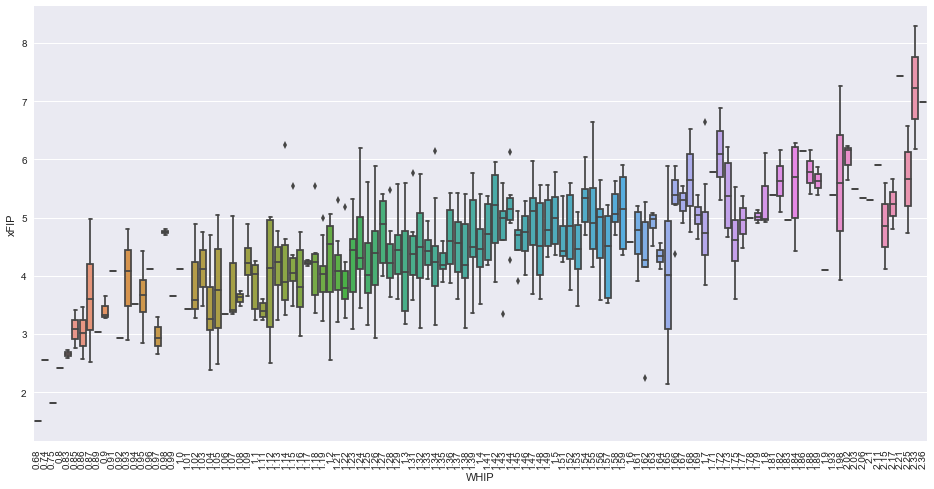

In [220]:
# this shows a steady climb in xFIP as WHIP grows
plt.figure(figsize = (16,8))
sns.boxplot(x='WHIP', y = 'xFIP', data = rate_pitching_stats_2017)
xt = plt.xticks(rotation=90)

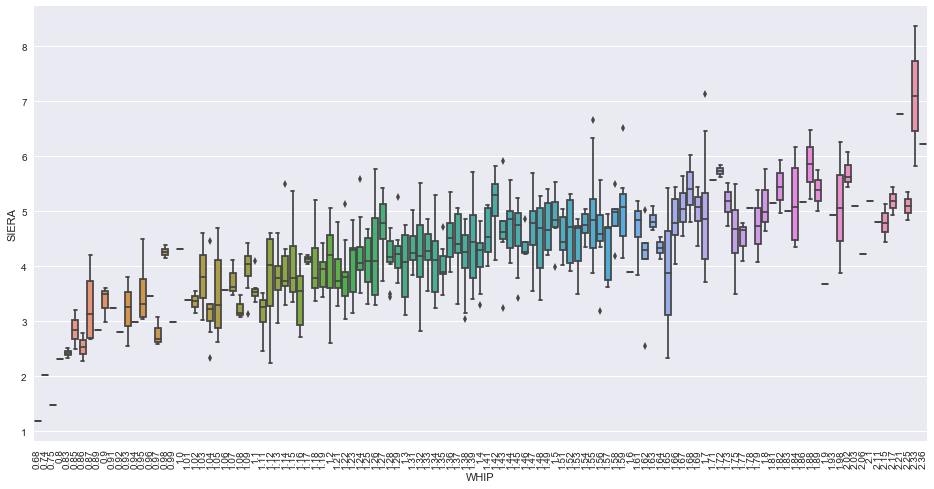

In [221]:
# similar stuff with SIERA
plt.figure(figsize = (16,8))
sns.boxplot(x='WHIP', y = 'SIERA', data = rate_pitching_stats_2017)
xt = plt.xticks(rotation=90)

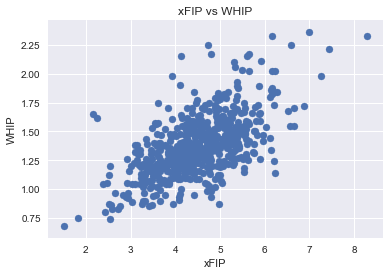

In [222]:
# again, let's try a scatter plot and see how that looks
plt.scatter(rate_pitching_stats_2017['xFIP'], rate_pitching_stats_2017['WHIP'])
plt.title('xFIP vs WHIP')
plt.xlabel('xFIP')
plt.ylabel('WHIP')
plt.show()

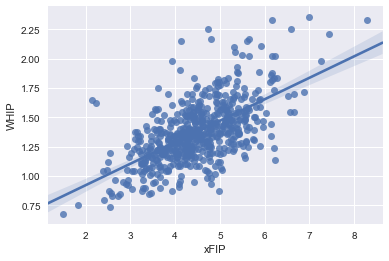

In [223]:
# how about with a regression line this time
sns.regplot(x="xFIP", y="WHIP", data=rate_pitching_stats_2017)

In an effort to beging breaking down this dataset, I'd like to look at variables that are highly correlated with xFIP and create thresholds or criteria that pitchers have to meet and segment the data accordingly. I initially started with the top 25% for hitters but landed on the top 50% after including several different variables so I'll do the same here with 'WHIP' and 'Kper9' before splitting the dataset into a reliever and starter group.

In [224]:
# looking at the breakdown in Launch_Speed, we see that the top 50% are > 1.36, let's start there and see what we come up with
rate_pitching_stats_2017['WHIP'].describe()

count    571.000000
mean       1.376550
std        0.266836
min        0.680000
25%        1.210000
50%        1.360000
75%        1.520000
max        2.360000
Name: WHIP, dtype: float64

In [225]:
# since lower WHIP is better, let's first look at the top 50% in WHIP and see what we're working with
rate_pitching_stats_2017[rate_pitching_stats_2017.WHIP < 1.36].sort_values(by='WHIP')

,Player_Name,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
135,Craig Kimbrel,1148,1.50,1.18,16.43,1.83,0.78,0.260,0.939,0.370,0.194,0.435,0.128,0.68,1.43,1.42,0.303,0.341,0.220,0.523,0.349,0.422,91.4,18.3,2462,95.9,95.78,6.34,1.009174
101,Chad Green,1141,2.55,2.03,13.43,2.22,0.52,0.236,0.823,0.264,0.271,0.465,0.067,0.74,1.83,1.75,0.266,0.318,0.172,0.438,0.294,0.369,89.3,19.7,2374,91.6,91.57,6.25,1.023438
340,Kenley Jansen,1012,1.82,1.48,14.36,0.92,0.66,0.289,0.913,0.384,0.210,0.406,0.089,0.75,1.32,1.31,0.317,0.293,0.165,0.482,0.345,0.322,83.8,17.4,2590,92.5,93.80,6.93,1.000000
477,Ryan Madson,855,2.42,2.32,10.22,1.37,0.31,0.263,0.809,0.547,0.241,0.212,0.069,0.80,1.83,1.99,0.279,0.306,0.103,0.382,0.282,0.322,84.3,2.6,2141,92.0,91.80,6.23,1.022059
53,Blake Parker,1068,2.73,2.51,11.50,2.14,0.94,0.229,0.784,0.470,0.181,0.349,0.135,0.83,2.54,2.71,0.274,0.299,0.205,0.479,0.310,0.349,86.8,9.2,1780,88.5,88.97,6.56,1.034247
31,Andrew Miller,987,2.59,2.34,13.64,3.02,0.43,0.233,0.871,0.395,0.244,0.361,0.070,0.83,1.44,1.99,0.258,0.297,0.108,0.367,0.265,0.314,81.2,10.0,2288,89.8,90.89,6.81,1.025000
385,Matt Albers,966,3.41,3.20,9.30,2.51,0.89,0.203,0.924,0.510,0.186,0.303,0.136,0.85,1.62,3.40,0.236,0.268,0.162,0.399,0.270,0.286,82.6,7.5,2101,91.5,91.96,6.54,1.006757
160,David Robertson,1032,2.76,2.50,12.91,3.03,0.79,0.216,0.894,0.471,0.159,0.370,0.118,0.85,1.84,2.57,0.252,0.289,0.187,0.439,0.292,0.327,86.6,9.6,2591,87.2,87.27,6.37,1.007194
492,Sean Doolittle,786,3.47,2.78,10.87,1.75,0.88,0.242,0.703,0.315,0.185,0.500,0.081,0.86,2.81,2.59,0.279,0.257,0.164,0.443,0.303,0.285,82.1,24.1,2212,93.3,93.27,6.31,1.024590
471,Roberto Osuna,961,2.57,2.27,11.67,1.27,0.42,0.285,0.595,0.480,0.178,0.342,0.058,0.86,3.38,1.74,0.300,0.305,0.120,0.420,0.307,0.325,85.9,11.2,2401,91.1,90.46,5.90,1.020000


In [226]:
# our initial starting point here is 284, way too many to go through manually so let's keep going
print(len(rate_pitching_stats_2017[rate_pitching_stats_2017.WHIP < 1.36]))

284


In [227]:
# 'WHIP' is a good start but now let's also include 'Kper9' and see how that changes our data
rate_pitching_stats_2017['Kper9'].describe()

count    571.000000
mean       8.337268
std        2.148814
min        2.250000
25%        6.940000
50%        8.190000
75%        9.715000
max       16.430000
Name: Kper9, dtype: float64

In [228]:
# since more Ks (strikeouts) good, let's look at higher than 8.19, dominant names at the top, what about the bottom?
rate_pitching_stats_2017[rate_pitching_stats_2017.Kper9 > 8.19].sort_values(by='Total_Pitches', ascending=False)

,Player_Name,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
335,Justin Verlander,3531,4.17,4.05,9.57,3.15,1.18,0.271,0.797,0.335,0.238,0.427,0.115,1.17,3.36,3.84,0.310,0.325,0.208,0.517,0.351,0.378,87.3,16.3,2518,90.9,90.15,5.80,1.009107
118,Chris Sale,3428,2.65,2.58,12.93,1.81,1.01,0.301,0.784,0.387,0.204,0.409,0.121,0.97,2.90,2.45,0.340,0.307,0.230,0.570,0.384,0.357,86.2,14.4,2261,88.9,87.83,5.85,1.012346
110,Chris Archer,3406,3.35,3.44,11.15,2.69,1.21,0.325,0.713,0.420,0.220,0.360,0.141,1.26,4.07,3.40,0.361,0.333,0.236,0.596,0.407,0.378,89.0,12.2,2339,91.1,90.21,5.75,1.005607
213,Gio Gonzalez,3364,4.24,4.41,8.42,3.54,0.94,0.258,0.816,0.458,0.191,0.351,0.111,1.18,2.96,3.93,0.291,0.295,0.173,0.464,0.319,0.329,84.9,10.7,2146,85.6,85.22,6.15,1.018416
343,Kevin Gausman,3357,4.33,4.41,8.63,3.42,1.40,0.336,0.760,0.427,0.221,0.352,0.148,1.49,4.68,4.48,0.373,0.344,0.233,0.607,0.417,0.392,87.3,11.6,2132,91.9,91.34,6.11,1.007181
212,Gerrit Cole,3298,3.81,3.97,8.69,2.44,1.37,0.298,0.746,0.458,0.206,0.337,0.159,1.25,4.26,4.08,0.338,0.332,0.240,0.578,0.387,0.374,85.4,10.5,2160,92.0,91.71,6.15,1.010204
267,Jeff Samardzija,3273,3.60,3.63,8.88,1.39,1.30,0.303,0.675,0.415,0.221,0.365,0.138,1.14,4.42,3.61,0.342,0.319,0.258,0.601,0.396,0.368,86.9,11.9,2395,90.5,89.94,5.96,1.013423
377,Marco Estrada,3246,5.09,4.69,8.52,3.44,1.50,0.295,0.719,0.303,0.194,0.503,0.112,1.38,4.98,4.61,0.338,0.290,0.273,0.611,0.398,0.341,86.6,21.3,2323,84.3,82.41,5.28,1.010909
513,Tanner Roark,3216,4.15,4.31,8.24,3.18,1.14,0.300,0.663,0.482,0.198,0.320,0.135,1.33,4.67,4.13,0.333,0.325,0.202,0.535,0.369,0.358,86.2,9.3,2160,87.7,87.00,5.93,1.009346
311,Jose Quintana,3176,3.73,3.80,9.87,2.91,1.10,0.301,0.714,0.448,0.208,0.345,0.132,1.22,4.15,3.68,0.335,0.328,0.222,0.557,0.378,0.371,87.0,11.3,1988,88.1,88.36,6.45,1.007874


In [229]:
# lot of players I have never heard of and look at some of those WHIPs, wow gross
rate_pitching_stats_2017[rate_pitching_stats_2017.Kper9 > 8.19].sort_values(by='Total_Pitches')

,Player_Name,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
170,Domingo German,253,3.52,3.93,11.30,5.65,0.63,0.294,0.753,0.545,0.212,0.242,0.125,1.40,3.14,3.44,0.333,0.246,0.182,0.515,0.344,0.260,82.5,8.5,2544,92.1,91.60,6.04,1.060606
161,Dayan Diaz,268,2.24,2.56,13.85,2.77,2.08,0.452,0.417,0.412,0.324,0.265,0.333,1.62,9.00,4.00,0.500,0.429,0.441,0.941,0.609,0.484,90.3,7.0,2315,90.4,90.62,6.30,1.000000
369,Luis Santos,274,4.63,3.79,8.64,2.16,2.16,0.250,1.000,0.333,0.146,0.521,0.160,1.14,2.70,5.08,0.313,0.289,0.354,0.667,0.409,0.362,88.0,20.8,2351,89.5,89.86,6.44,1.000000
559,Yacksel Rios,277,5.13,4.49,9.37,4.96,2.20,0.256,0.870,0.348,0.174,0.478,0.182,1.47,4.41,5.91,0.326,0.304,0.348,0.674,0.411,0.356,84.2,17.5,2002,90.9,90.58,6.22,1.021739
321,Josh Ravin,278,4.71,4.09,10.26,4.86,2.16,0.211,0.610,0.381,0.167,0.452,0.211,1.26,6.48,5.80,0.286,0.328,0.452,0.738,0.420,0.428,88.0,16.9,2457,92.8,91.42,5.57,1.000000
315,Jose Valdez,294,5.10,4.06,8.50,2.50,4.00,0.271,0.595,0.327,0.182,0.491,0.296,1.44,8.50,8.21,0.382,0.401,0.582,0.964,0.545,0.500,91.8,18.0,2527,91.5,90.36,5.58,1.018182
301,Jonathan Broxton,296,4.81,4.93,9.19,6.32,1.15,0.429,0.705,0.426,0.277,0.298,0.143,2.17,6.89,4.88,0.500,0.353,0.196,0.696,0.470,0.384,84.0,6.6,2147,91.7,91.97,6.38,1.108696
264,Jeff Beliveau,296,4.60,3.83,9.77,3.45,2.30,0.310,0.544,0.400,0.156,0.444,0.200,1.47,7.47,5.65,0.395,0.337,0.372,0.767,0.459,0.395,88.6,13.1,2396,83.0,82.55,6.13,1.069767
183,Edgar Santana,296,4.49,4.54,10.00,6.00,1.00,0.304,0.802,0.447,0.255,0.298,0.143,1.56,3.50,4.55,0.340,0.292,0.255,0.596,0.390,0.334,87.6,6.4,2220,92.7,91.86,5.77,1.021277
85,Buddy Baumann,297,4.89,3.56,10.70,3.57,2.04,0.189,1.000,0.341,0.073,0.585,0.167,1.02,2.55,5.42,0.268,0.260,0.341,0.610,0.366,0.348,87.6,19.7,2318,88.4,88.74,6.42,1.000000


In [230]:
# now let's combine our two top 50% and see what we come up with
rate_pitching_stats_2017_v2 = rate_pitching_stats_2017[(rate_pitching_stats_2017.WHIP < 1.36) & 
                                                       (rate_pitching_stats_2017.Kper9 > 8.19)]
rate_pitching_stats_2017_v2.sort_values(by='Total_Pitches')

,Player_Name,Total_Pitches,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
369,Luis Santos,274,4.63,3.79,8.64,2.16,2.16,0.250,1.000,0.333,0.146,0.521,0.160,1.14,2.70,5.08,0.313,0.289,0.354,0.667,0.409,0.362,88.0,20.8,2351,89.5,89.86,6.44,1.000000
321,Josh Ravin,278,4.71,4.09,10.26,4.86,2.16,0.211,0.610,0.381,0.167,0.452,0.211,1.26,6.48,5.80,0.286,0.328,0.452,0.738,0.420,0.428,88.0,16.9,2457,92.8,91.42,5.57,1.000000
85,Buddy Baumann,297,4.89,3.56,10.70,3.57,2.04,0.189,1.000,0.341,0.073,0.585,0.167,1.02,2.55,5.42,0.268,0.260,0.341,0.610,0.366,0.348,87.6,19.7,2318,88.4,88.74,6.42,1.000000
502,Silvino Bracho,349,3.99,3.27,10.89,3.05,2.18,0.260,0.611,0.436,0.091,0.473,0.192,1.21,5.66,4.90,0.327,0.300,0.309,0.636,0.407,0.385,87.7,15.1,2342,88.8,87.75,5.62,1.000000
214,Giovanny Gallegos,363,3.92,3.45,9.74,2.21,1.33,0.310,0.642,0.356,0.220,0.424,0.120,1.28,4.87,3.65,0.362,0.361,0.241,0.603,0.399,0.423,88.2,15.3,2248,89.1,87.07,5.21,1.034483
425,Mike Wright,417,3.83,3.34,10.08,2.52,1.80,0.318,0.690,0.437,0.225,0.338,0.208,1.32,5.76,4.72,0.371,0.359,0.329,0.700,0.446,0.412,88.8,11.3,2170,91.2,90.54,5.98,1.014286
209,Garrett Richards,427,3.32,3.60,8.78,2.28,0.33,0.233,0.720,0.542,0.167,0.292,0.048,0.90,2.28,2.43,0.247,0.300,0.110,0.356,0.257,0.333,85.7,5.3,2692,93.5,92.82,5.86,1.013699
487,Sammy Solis,439,4.35,4.08,9.69,4.50,1.38,0.269,0.612,0.465,0.155,0.380,0.148,1.35,5.88,4.50,0.310,0.289,0.239,0.549,0.365,0.331,87.0,12.3,2261,89.0,89.61,6.71,1.000000
438,Noah Syndergaard,459,2.48,2.74,10.09,0.89,0.00,0.337,0.576,0.576,0.188,0.235,0.000,1.05,2.97,1.31,0.345,0.325,0.083,0.429,0.332,0.342,86.2,2.2,2055,95.1,94.73,6.23,1.023810
307,Jose Alvarado,463,3.61,3.51,8.80,2.73,0.30,0.274,0.665,0.537,0.159,0.305,0.040,1.11,3.64,2.55,0.293,0.266,0.110,0.402,0.292,0.300,84.5,4.7,2143,96.7,97.14,6.46,1.036585


In [231]:
# combining 'WHIP' and 'Kper9' cuts our list down by almost 100
print(len(rate_pitching_stats_2017_v2))

177


The confusing part part here is that we have both starting pitchers and relief pitchers combined together when they should be serparated because they serve different purposes. This list is a good starting point but I think it would be more beneficial to break our list down into a relief pitcher and a starting pitcher group. To do that, I will put the 'GS' (Games Started) variable back into the rate_pitching_stats datasets and set the threshold to >= 2 which signifies that player will have started at least two or more games. Occasionally relief pitchers get a "spot start" where they start one game per year and only go a few innings but they are not true starters which is why I chose the 2 threshold. I'm also going to include IP to be able to cut out pitchers who already have full work loads (IP > 162) which is the threshold used by MLB to qualify for pitching leaderboards. It is important to remember that we're looking for potential breakout players, not players who are already studs, those are obvious.

In [232]:
# adding in 'GS' and 'IP' variable
rate_pitching_stats_2015 = merged_pitching_2015.filter(['Player_Name', 'Total_Pitches', 'GS', 'IP', 'xFIP', 'SIERA', 'Kper9', 
                                                        'BBper9', 'HRper9', 'BABIP', 'LOBperc', 'GBperc', 'LDperc', 'FBperc', 
                                                        'HRperFB','WHIP', 'ERA', 'FIP',  'BA', 'xBA', 'ISO', 'SLG', 'wOBA', 
                                                        'xwOBA', 'Launch_Speed', 'Launch_Angle', 'Spin_Rate', 'Velocity', 
                                                        'Effective_Speed', 'Release_Extension', 'SwingsperAB'], axis=1)
rate_pitching_stats_2016 = merged_pitching_2016.filter(['Player_Name', 'Total_Pitches', 'GS', 'IP', 'xFIP', 'SIERA', 'Kper9', 
                                                        'BBper9', 'HRper9', 'BABIP', 'LOBperc', 'GBperc', 'LDperc', 'FBperc', 
                                                        'HRperFB','WHIP', 'ERA', 'FIP',  'BA', 'xBA', 'ISO', 'SLG', 'wOBA', 
                                                        'xwOBA', 'Launch_Speed', 'Launch_Angle', 'Spin_Rate', 'Velocity', 
                                                        'Effective_Speed', 'Release_Extension', 'SwingsperAB'], axis=1)
rate_pitching_stats_2017 = merged_pitching_2017.filter(['Player_Name', 'Total_Pitches', 'GS', 'IP', 'xFIP', 'SIERA', 'Kper9', 
                                                        'BBper9', 'HRper9', 'BABIP', 'LOBperc', 'GBperc', 'LDperc', 'FBperc', 
                                                        'HRperFB','WHIP', 'ERA', 'FIP',  'BA', 'xBA', 'ISO', 'SLG', 'wOBA', 
                                                        'xwOBA', 'Launch_Speed', 'Launch_Angle', 'Spin_Rate', 'Velocity', 
                                                        'Effective_Speed', 'Release_Extension', 'SwingsperAB'], axis=1)

In [233]:
# just to make sure we added the variables correctly
rate_pitching_stats_2017.head()

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
0,A.J. Cole,937,8,52.0,5.21,5.12,7.62,4.67,1.38,0.293,0.831,0.440,0.167,0.393,0.136,1.50,3.81,5.20,0.338,0.322,0.232,0.570,0.378,0.367,86.2,12.6,2082,89.6,89.77,6.49,1.026490
1,A.J. Griffin,1322,15,77.1,6.14,5.30,7.10,3.26,2.33,0.251,0.707,0.285,0.132,0.583,0.142,1.34,5.94,6.26,0.318,0.280,0.343,0.661,0.404,0.351,86.5,23.4,2261,80.4,80.58,6.59,1.016736
2,A.J. Schugel,496,0,32.0,4.23,4.28,7.59,3.94,0.84,0.304,0.907,0.527,0.194,0.280,0.115,1.41,1.97,4.00,0.333,0.293,0.172,0.505,0.354,0.330,87.8,7.0,2050,88.1,86.59,5.45,1.021505
3,AJ Ramos,1104,0,58.2,4.30,4.01,11.05,5.22,1.07,0.294,0.771,0.401,0.204,0.395,0.121,1.41,3.99,4.10,0.331,0.299,0.209,0.541,0.369,0.345,84.9,12.7,2238,86.0,84.84,5.65,1.013514
4,Aaron Bummer,374,0,22.0,5.25,5.42,6.95,6.14,1.64,0.167,0.769,0.544,0.140,0.316,0.222,1.27,4.50,6.16,0.232,0.276,0.250,0.482,0.290,0.315,86.0,3.6,1940,89.8,89.23,5.93,1.035714


In [234]:
# creating the potential breakout starting pitcher dataset
rate_starting_pitching_stats_2017_v2 = rate_pitching_stats_2017[(rate_pitching_stats_2017.WHIP < 1.36) & 
                                                            (rate_pitching_stats_2017.Kper9 > 8.19) & 
                                                            (rate_pitching_stats_2017.GS >= 2) &
                                                            (rate_pitching_stats_2017.IP < 162)]

In [235]:
# pretty interesting starters list here, the bottom of the list is obvious but maybe not so much the top part of it
# since Ks are king from fantasy pitchers, i'll sort by 'Kper9', this whole group will need to be vetted
rate_starting_pitching_stats_2017_v2.sort_values(by='Kper9', ascending=False)

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
152,Danny Salazar,1814,19,103.0,3.21,3.40,12.67,3.84,1.22,0.343,0.741,0.392,0.253,0.355,0.161,1.34,4.28,3.48,0.387,0.358,0.251,0.638,0.432,0.412,88.1,12.2,2223,90.8,89.77,5.74,1.016461
462,Rich Hill,2224,25,135.2,3.88,3.61,11.01,3.25,1.19,0.261,0.804,0.369,0.172,0.459,0.125,1.09,3.32,3.72,0.307,0.286,0.227,0.534,0.352,0.335,84.3,16.2,2632,81.0,80.12,5.93,1.018634
62,Brad Peacock,2248,21,132.0,3.73,3.76,10.98,3.89,0.68,0.286,0.781,0.437,0.186,0.378,0.082,1.19,3.00,3.07,0.309,0.282,0.173,0.481,0.339,0.315,85.3,12.6,2408,86.2,85.69,5.99,1.003086
169,Dinelson Lamet,1941,21,114.1,4.20,4.03,10.94,4.25,1.42,0.261,0.692,0.371,0.198,0.431,0.148,1.24,4.57,4.35,0.314,0.300,0.286,0.600,0.378,0.360,87.3,14.1,2386,91.1,90.03,5.78,1.021429
84,Bud Norris,1103,3,62.0,3.66,3.60,10.74,3.92,1.16,0.310,0.762,0.448,0.245,0.307,0.160,1.34,4.21,3.90,0.344,0.334,0.196,0.540,0.380,0.364,88.6,11.2,2507,90.1,89.79,5.98,1.000000
374,Luke Weaver,1046,10,60.1,2.93,3.29,10.74,2.54,1.04,0.335,0.744,0.494,0.238,0.269,0.163,1.26,3.88,3.17,0.369,0.333,0.200,0.569,0.399,0.368,85.7,7.2,1981,87.9,87.23,5.85,1.012500
251,James Paxton,2268,24,136.0,3.25,3.45,10.32,2.45,0.60,0.300,0.755,0.449,0.224,0.327,0.078,1.10,2.98,2.61,0.323,0.307,0.146,0.469,0.337,0.324,86.9,12.3,2183,92.1,92.13,6.40,1.017143
428,Nathan Karns,749,8,45.1,3.71,3.59,10.13,2.58,1.79,0.283,0.807,0.496,0.124,0.380,0.196,1.19,4.17,4.48,0.336,0.312,0.295,0.631,0.409,0.396,88.0,10.0,2217,89.1,89.87,6.77,1.000000
416,Mike Clevinger,2105,21,121.2,4.05,4.24,10.13,4.44,0.96,0.273,0.797,0.395,0.241,0.365,0.119,1.25,3.11,3.85,0.307,0.324,0.213,0.520,0.352,0.372,86.9,13.6,2080,88.0,88.57,6.56,1.003333
438,Noah Syndergaard,459,7,30.1,2.48,2.74,10.09,0.89,0.00,0.337,0.576,0.576,0.188,0.235,0.000,1.05,2.97,1.31,0.345,0.325,0.083,0.429,0.332,0.342,86.2,2.2,2055,95.1,94.73,6.23,1.023810


In [236]:
# then creating our 50% threshold and segmenting into starters, we have quite a solid starting list here.
print(len(rate_starting_pitching_stats_2017_v2))

34


In [237]:
# if we don't want to research 34 pitchers, let's try one more time at the top 25%
rate_starting_pitching_stats_2017_v3 = rate_pitching_stats_2017[(rate_pitching_stats_2017.WHIP < 1.21) & 
                                                            (rate_pitching_stats_2017.Kper9 > 9.715) & 
                                                            (rate_pitching_stats_2017.GS >= 2) &
                                                            (rate_pitching_stats_2017.IP < 162)]

In [238]:
# and then there were 7, not bad
rate_starting_pitching_stats_2017_v3.sort_values(by='Kper9', ascending=False)

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
462,Rich Hill,2224,25,135.2,3.88,3.61,11.01,3.25,1.19,0.261,0.804,0.369,0.172,0.459,0.125,1.09,3.32,3.72,0.307,0.286,0.227,0.534,0.352,0.335,84.3,16.2,2632,81.0,80.12,5.93,1.018634
62,Brad Peacock,2248,21,132.0,3.73,3.76,10.98,3.89,0.68,0.286,0.781,0.437,0.186,0.378,0.082,1.19,3.00,3.07,0.309,0.282,0.173,0.481,0.339,0.315,85.3,12.6,2408,86.2,85.69,5.99,1.003086
251,James Paxton,2268,24,136.0,3.25,3.45,10.32,2.45,0.60,0.300,0.755,0.449,0.224,0.327,0.078,1.10,2.98,2.61,0.323,0.307,0.146,0.469,0.337,0.324,86.9,12.3,2183,92.1,92.13,6.40,1.017143
428,Nathan Karns,749,8,45.1,3.71,3.59,10.13,2.58,1.79,0.283,0.807,0.496,0.124,0.380,0.196,1.19,4.17,4.48,0.336,0.312,0.295,0.631,0.409,0.396,88.0,10.0,2217,89.1,89.87,6.77,1.000000
438,Noah Syndergaard,459,7,30.1,2.48,2.74,10.09,0.89,0.00,0.337,0.576,0.576,0.188,0.235,0.000,1.05,2.97,1.31,0.345,0.325,0.083,0.429,0.332,0.342,86.2,2.2,2055,95.1,94.73,6.23,1.023810
104,Charlie Morton,2387,25,146.2,3.58,3.70,10.00,3.07,0.86,0.294,0.730,0.518,0.192,0.290,0.125,1.19,3.62,3.46,0.324,0.316,0.225,0.549,0.368,0.347,85.0,6.7,2325,89.9,88.78,5.65,1.010363
365,Luis Castillo,1484,15,89.1,3.41,3.63,9.87,3.22,1.11,0.247,0.801,0.588,0.122,0.290,0.172,1.07,3.12,3.74,0.292,0.272,0.228,0.521,0.335,0.301,84.9,5.4,2130,93.6,92.44,5.71,1.031963


In [239]:
# now let's try creating the relief pitcher dataset
rate_relief_pitching_stats_2017_v2 = rate_pitching_stats_2017[(rate_pitching_stats_2017.WHIP < 1.36) & 
                                                            (rate_pitching_stats_2017.Kper9 > 8.19) & 
                                                            (rate_pitching_stats_2017.GS < 2)]

In [240]:
# there's the reliever list, pretty pretty long but if sorted by xFIP, gives us a much better look at the best of the best
rate_relief_pitching_stats_2017_v2.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
135,Craig Kimbrel,1148,0,69.0,1.50,1.18,16.43,1.83,0.78,0.260,0.939,0.370,0.194,0.435,0.128,0.68,1.43,1.42,0.303,0.341,0.220,0.523,0.349,0.422,91.4,18.3,2462,95.9,95.78,6.34,1.009174
340,Kenley Jansen,1012,0,68.1,1.82,1.48,14.36,0.92,0.66,0.289,0.913,0.384,0.210,0.406,0.089,0.75,1.32,1.31,0.317,0.293,0.165,0.482,0.345,0.322,83.8,17.4,2590,92.5,93.80,6.93,1.000000
291,Joe Smith,801,0,54.0,2.39,2.33,11.83,1.67,0.67,0.328,0.720,0.496,0.214,0.290,0.105,1.04,3.33,2.10,0.354,0.309,0.162,0.515,0.371,0.332,85.5,6.4,2064,87.1,87.46,6.65,1.015385
477,Ryan Madson,855,0,59.0,2.42,2.32,10.22,1.37,0.31,0.263,0.809,0.547,0.241,0.212,0.069,0.80,1.83,1.99,0.279,0.306,0.103,0.382,0.282,0.322,84.3,2.6,2141,92.0,91.80,6.23,1.022059
520,Tommy Kahnle,1017,0,62.2,2.51,2.25,13.79,2.44,0.57,0.358,0.783,0.407,0.214,0.379,0.075,1.12,2.59,1.83,0.390,0.311,0.162,0.551,0.394,0.343,88.3,14.9,2086,95.3,95.90,6.61,1.036765
101,Chad Green,1141,1,69.0,2.55,2.03,13.43,2.22,0.52,0.236,0.823,0.264,0.271,0.465,0.067,0.74,1.83,1.75,0.266,0.318,0.172,0.438,0.294,0.369,89.3,19.7,2374,91.6,91.57,6.25,1.023438
531,Trevor Rosenthal,883,0,47.2,2.55,2.60,14.35,3.78,0.57,0.337,0.712,0.408,0.282,0.311,0.094,1.20,3.40,2.17,0.370,0.325,0.120,0.490,0.362,0.342,84.4,12.9,2296,95.1,94.39,5.91,1.040000
471,Roberto Osuna,961,0,64.0,2.57,2.27,11.67,1.27,0.42,0.285,0.595,0.480,0.178,0.342,0.058,0.86,3.38,1.74,0.300,0.305,0.120,0.420,0.307,0.325,85.9,11.2,2401,91.1,90.46,5.90,1.020000
31,Andrew Miller,987,0,62.2,2.59,2.34,13.64,3.02,0.43,0.233,0.871,0.395,0.244,0.361,0.070,0.83,1.44,1.99,0.258,0.297,0.108,0.367,0.265,0.314,81.2,10.0,2288,89.8,90.89,6.81,1.025000
53,Blake Parker,1068,0,67.1,2.73,2.51,11.50,2.14,0.94,0.229,0.784,0.470,0.181,0.349,0.135,0.83,2.54,2.71,0.274,0.299,0.205,0.479,0.310,0.349,86.8,9.2,1780,88.5,88.97,6.56,1.034247


In [241]:
# 116 relievers to sort through is too much, let's cut this list down a bit further
print(len(rate_relief_pitching_stats_2017_v2))

116


In [242]:
# 'HRper9' is one of the higher correlated variables with xFIP and is important for relievers but not as much for starters
rate_pitching_stats_2017['HRper9'].describe()

count    571.000000
mean       1.318949
std        0.658210
min        0.000000
25%        0.890000
50%        1.230000
75%        1.670000
max        4.980000
Name: HRper9, dtype: float64

In [243]:
# now let's try creating the relief pitcher dataset
rate_relief_pitching_stats_2017_v2 = rate_pitching_stats_2017[(rate_pitching_stats_2017.WHIP < 1.21) & 
                                                            (rate_pitching_stats_2017.Kper9 > 9.715) & 
                                                            (rate_pitching_stats_2017.GS < 2) &
                                                            (rate_pitching_stats_2017.HRper9 < 1.23)]

In [244]:
# a slimmed down reliever list looks much better
rate_relief_pitching_stats_2017_v2.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
135,Craig Kimbrel,1148,0,69.0,1.50,1.18,16.43,1.83,0.78,0.260,0.939,0.370,0.194,0.435,0.128,0.68,1.43,1.42,0.303,0.341,0.220,0.523,0.349,0.422,91.4,18.3,2462,95.9,95.78,6.34,1.009174
340,Kenley Jansen,1012,0,68.1,1.82,1.48,14.36,0.92,0.66,0.289,0.913,0.384,0.210,0.406,0.089,0.75,1.32,1.31,0.317,0.293,0.165,0.482,0.345,0.322,83.8,17.4,2590,92.5,93.80,6.93,1.000000
291,Joe Smith,801,0,54.0,2.39,2.33,11.83,1.67,0.67,0.328,0.720,0.496,0.214,0.290,0.105,1.04,3.33,2.10,0.354,0.309,0.162,0.515,0.371,0.332,85.5,6.4,2064,87.1,87.46,6.65,1.015385
477,Ryan Madson,855,0,59.0,2.42,2.32,10.22,1.37,0.31,0.263,0.809,0.547,0.241,0.212,0.069,0.80,1.83,1.99,0.279,0.306,0.103,0.382,0.282,0.322,84.3,2.6,2141,92.0,91.80,6.23,1.022059
520,Tommy Kahnle,1017,0,62.2,2.51,2.25,13.79,2.44,0.57,0.358,0.783,0.407,0.214,0.379,0.075,1.12,2.59,1.83,0.390,0.311,0.162,0.551,0.394,0.343,88.3,14.9,2086,95.3,95.90,6.61,1.036765
531,Trevor Rosenthal,883,0,47.2,2.55,2.60,14.35,3.78,0.57,0.337,0.712,0.408,0.282,0.311,0.094,1.20,3.40,2.17,0.370,0.325,0.120,0.490,0.362,0.342,84.4,12.9,2296,95.1,94.39,5.91,1.040000
101,Chad Green,1141,1,69.0,2.55,2.03,13.43,2.22,0.52,0.236,0.823,0.264,0.271,0.465,0.067,0.74,1.83,1.75,0.266,0.318,0.172,0.438,0.294,0.369,89.3,19.7,2374,91.6,91.57,6.25,1.023438
471,Roberto Osuna,961,0,64.0,2.57,2.27,11.67,1.27,0.42,0.285,0.595,0.480,0.178,0.342,0.058,0.86,3.38,1.74,0.300,0.305,0.120,0.420,0.307,0.325,85.9,11.2,2401,91.1,90.46,5.90,1.020000
31,Andrew Miller,987,0,62.2,2.59,2.34,13.64,3.02,0.43,0.233,0.871,0.395,0.244,0.361,0.070,0.83,1.44,1.99,0.258,0.297,0.108,0.367,0.265,0.314,81.2,10.0,2288,89.8,90.89,6.81,1.025000
53,Blake Parker,1068,0,67.1,2.73,2.51,11.50,2.14,0.94,0.229,0.784,0.470,0.181,0.349,0.135,0.83,2.54,2.71,0.274,0.299,0.205,0.479,0.310,0.349,86.8,9.2,1780,88.5,88.97,6.56,1.034247


In [245]:
# 38 is great but again we have pitchers who are already full time relievers in our list
print(len(rate_relief_pitching_stats_2017_v2))

38


In [246]:
# there is no official relief pitching IP cutoff like for starters so let's make the cutoff ourselves and take out the top 25%
#let's first make a dataset with pitchers who started less than two games and then we'll get the top 25% IP from that set
rate_pitching_IP_cutoff_2017 = rate_pitching_stats_2017[(rate_pitching_stats_2017.GS < 2)]

In [247]:
# looks like we need to look at pitchers who threw under 61 innings
rate_pitching_IP_cutoff_2017['IP'].describe()

count    291.000000
mean      46.685911
std       18.924384
min       12.000000
25%       30.100000
50%       50.100000
75%       61.050000
max       91.100000
Name: IP, dtype: float64

In [248]:
# now let's try creating the relief pitcher dataset
rate_relief_pitching_stats_2017_v2 = rate_pitching_stats_2017[(rate_pitching_stats_2017.WHIP < 1.21) & 
                                                            (rate_pitching_stats_2017.Kper9 > 9.715) & 
                                                            (rate_pitching_stats_2017.GS < 2) &
                                                            (rate_pitching_stats_2017.HRper9 < 1.23) &
                                                            (rate_pitching_stats_2017.IP < 61)]

In [249]:
# and now for our final relief pitching group
rate_relief_pitching_stats_2017_v2.sort_values(by='Kper9', ascending=False)

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
531,Trevor Rosenthal,883,0,47.2,2.55,2.60,14.35,3.78,0.57,0.337,0.712,0.408,0.282,0.311,0.094,1.20,3.40,2.17,0.370,0.325,0.120,0.490,0.362,0.342,84.4,12.9,2296,95.1,94.39,5.91,1.040000
319,Josh Hader,779,0,47.2,3.66,2.99,12.84,4.15,0.76,0.233,0.881,0.344,0.144,0.511,0.087,0.99,2.08,3.03,0.272,0.264,0.217,0.489,0.316,0.301,84.6,21.0,2023,91.5,92.28,6.75,1.021739
42,Aroldis Chapman,874,0,50.1,3.24,2.97,12.34,3.58,0.54,0.296,0.717,0.487,0.162,0.350,0.073,1.13,3.22,2.56,0.319,0.276,0.155,0.474,0.340,0.307,84.4,11.3,2464,98.2,98.77,6.71,1.008621
551,Wade Davis,1060,0,58.2,3.57,3.29,12.12,4.30,0.92,0.262,0.877,0.405,0.214,0.382,0.120,1.14,2.30,3.38,0.298,0.321,0.198,0.496,0.337,0.366,84.8,13.2,2407,91.1,90.77,6.02,1.007634
342,Keone Kela,614,0,38.2,4.08,3.25,11.87,3.96,0.93,0.179,0.790,0.305,0.122,0.573,0.085,0.91,2.79,3.26,0.220,0.262,0.171,0.390,0.260,0.319,86.2,25.3,2258,90.6,91.01,6.51,1.000000
431,Nick Goody,901,0,54.2,3.74,3.07,11.85,3.29,1.15,0.269,0.805,0.282,0.234,0.484,0.117,1.08,2.80,3.45,0.312,0.316,0.240,0.552,0.365,0.369,87.9,21.3,2236,88.1,88.07,6.26,1.008000
291,Joe Smith,801,0,54.0,2.39,2.33,11.83,1.67,0.67,0.328,0.720,0.496,0.214,0.290,0.105,1.04,3.33,2.10,0.354,0.309,0.162,0.515,0.371,0.332,85.5,6.4,2064,87.1,87.46,6.65,1.015385
154,Darren O'Day,1011,0,60.1,3.48,3.16,11.34,3.58,1.19,0.256,0.775,0.478,0.147,0.375,0.157,1.08,3.43,3.70,0.301,0.284,0.206,0.507,0.344,0.335,86.3,12.7,2246,84.1,84.30,6.42,1.007353
540,Tyler Lyons,902,0,54.0,3.65,3.14,11.33,3.33,0.50,0.295,0.793,0.419,0.210,0.371,0.065,1.09,2.83,2.86,0.322,0.318,0.157,0.479,0.335,0.353,85.8,14.1,2182,85.4,84.28,5.61,1.033058
216,Greg Holland,883,0,57.1,4.05,3.53,10.99,4.08,1.10,0.252,0.752,0.416,0.131,0.453,0.113,1.15,3.61,3.72,0.292,0.276,0.219,0.511,0.339,0.323,87.6,13.5,2244,89.7,89.13,5.80,1.007299


* Relief pitcher success in fantasy is highly dependant on getting Saves. Just because a relief pitcher is 'elite' does not mean that they'll be guaranteed Saves, especially in today's game which makes relief pitcher breakout lists that much harder to compile. 

In [250]:
# let's take a look back at 2016 data
rate_pitching_stats_2016['Kper9'].describe()

count    554.000000
mean       8.198556
std        2.090216
min        2.550000
25%        6.822500
50%        8.025000
75%        9.535000
max       15.530000
Name: Kper9, dtype: float64

In [251]:
# and 'WHIP' for 2016
rate_pitching_stats_2016['WHIP'].describe()

count    554.000000
mean       1.371552
std        0.266808
min        0.670000
25%        1.200000
50%        1.345000
75%        1.510000
max        2.370000
Name: WHIP, dtype: float64

In [252]:
# and 'HRper9' for 2016
rate_pitching_stats_2016['HRper9'].describe()

count    554.000000
mean       1.206300
std        0.655602
min        0.000000
25%        0.792500
50%        1.120000
75%        1.515000
max        4.440000
Name: HRper9, dtype: float64

In [253]:
# now let's try creating the relief pitcher dataset
rate_relief_pitching_stats_2016_v2 = rate_pitching_stats_2016[(rate_pitching_stats_2016.WHIP < 1.345) & 
                                                            (rate_pitching_stats_2016.Kper9 > 8.025) & 
                                                            (rate_pitching_stats_2016.GS < 2) &
                                                            (rate_pitching_stats_2016.HRper9 < 1.12)]

In [254]:
# some obvious names here but also some fun ones
rate_relief_pitching_stats_2016_v2.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
32,Andrew Miller,1118,0,74.1,1.18,1.10,14.89,1.09,0.97,0.256,0.957,0.543,0.171,0.286,0.200,0.69,1.45,1.68,0.302,0.289,0.252,0.554,0.358,0.331,87.0,5.5,2320,89.2,89.83,6.67,1.014388
152,Dellin Betances,1250,0,73.0,1.75,1.94,15.53,3.45,0.62,0.353,0.684,0.539,0.191,0.270,0.132,1.12,3.08,1.78,0.380,0.318,0.183,0.563,0.402,0.349,85.6,5.8,2641,91.7,91.40,6.11,1.014085
172,Edwin Diaz,831,0,51.2,1.88,1.82,15.33,2.61,0.87,0.377,0.839,0.468,0.225,0.306,0.147,1.16,2.79,2.04,0.405,0.353,0.198,0.604,0.436,0.380,87.9,13.1,2292,94.4,94.37,6.49,1.000000
42,Aroldis Chapman,976,0,58.0,1.92,1.95,13.97,2.79,0.31,0.268,0.805,0.460,0.248,0.292,0.061,0.86,1.55,1.42,0.283,0.312,0.124,0.407,0.296,0.325,87.2,8.9,2470,98.8,99.29,6.71,1.008850
545,Zach Britton,1027,0,67.0,2.09,1.74,9.94,2.42,0.13,0.230,0.897,0.800,0.113,0.088,0.071,0.84,0.54,1.94,0.235,0.245,0.068,0.302,0.234,0.252,88.1,-8.5,2096,96.3,95.36,5.44,1.006173
12,Adam Ottavino,458,0,27.0,2.36,2.15,11.67,2.33,1.00,0.250,0.790,0.619,0.175,0.206,0.231,0.93,2.67,3.00,0.286,0.307,0.143,0.429,0.310,0.321,88.8,1.7,2311,90.1,90.69,6.45,1.000000
81,Carl Edwards Jr.,623,0,36.0,2.40,2.42,13.00,3.50,1.00,0.162,0.598,0.500,0.208,0.292,0.190,0.81,3.75,2.87,0.214,0.330,0.214,0.429,0.263,0.373,85.9,9.4,2627,92.8,93.66,6.73,1.028571
322,Kenley Jansen,1002,0,68.2,2.41,1.60,13.63,1.44,0.52,0.238,0.802,0.300,0.154,0.546,0.056,0.67,1.83,1.44,0.269,0.254,0.185,0.454,0.299,0.293,85.0,21.3,2556,93.5,94.86,7.12,1.030769
320,Ken Giles,1117,0,65.2,2.67,2.48,13.98,3.43,1.10,0.349,0.726,0.396,0.247,0.357,0.145,1.29,4.11,2.86,0.390,0.341,0.279,0.669,0.442,0.384,87.2,11.0,2350,94.2,92.32,5.36,1.019481
20,Alex Colome,860,0,56.2,2.75,2.56,11.28,2.38,0.95,0.280,0.930,0.471,0.232,0.297,0.146,1.02,1.91,2.92,0.312,0.312,0.152,0.464,0.336,0.343,90.0,7.9,2118,92.3,91.65,6.05,1.000000


In [255]:
# now let's try creating the starting pitcher dataset
rate_starting_pitching_stats_2016_v2 = rate_pitching_stats_2016[(rate_pitching_stats_2016.WHIP < 1.345) & 
                                                            (rate_pitching_stats_2016.Kper9 > 8.025) & 
                                                            (rate_pitching_stats_2016.GS >= 2) & 
                                                            (rate_pitching_stats_2016.IP < 162)]

In [256]:
# some obvious names here but also some fun ones
rate_starting_pitching_stats_2016_v2.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
116,Clayton Kershaw,2062,21,149.0,2.28,2.41,10.39,0.66,0.48,0.254,0.800,0.494,0.205,0.301,0.075,0.72,1.69,1.80,0.274,0.285,0.124,0.398,0.287,0.314,86.0,8.4,2333,89.1,88.71,6.22,1.014124
96,Charlie Morton,276,4,17.1,3.01,3.56,9.87,4.15,0.52,0.326,0.694,0.628,0.209,0.163,0.143,1.33,4.15,3.09,0.349,0.382,0.116,0.465,0.348,0.388,87.5,4.4,2245,91.1,88.61,5.24,1.023256
7,Aaron Nola,1796,20,111.0,3.08,3.29,9.81,2.35,0.81,0.334,0.606,0.552,0.200,0.248,0.128,1.31,4.78,3.08,0.365,0.327,0.182,0.547,0.383,0.350,85.4,5.0,2099,85.7,85.40,6.40,1.028302
148,David Phelps,1497,5,86.2,3.15,3.12,11.84,3.95,0.62,0.286,0.842,0.462,0.205,0.333,0.092,1.14,2.28,2.80,0.313,0.294,0.154,0.467,0.332,0.326,86.6,9.1,2345,91.3,90.12,5.61,1.015385
542,Yu Darvish,1579,17,100.1,3.19,3.08,11.84,2.78,1.08,0.290,0.733,0.404,0.196,0.400,0.120,1.12,3.41,3.09,0.329,0.299,0.224,0.553,0.371,0.345,86.3,13.2,2443,88.7,88.98,6.33,1.016260
483,Stephen Strasburg,2385,24,147.2,3.20,3.18,11.15,2.68,0.91,0.294,0.736,0.395,0.213,0.392,0.106,1.10,3.60,2.92,0.328,0.313,0.212,0.540,0.365,0.354,86.7,13.3,2198,92.3,93.20,6.73,1.016529
25,Alex Wood,985,10,60.1,3.29,3.48,9.85,2.98,0.75,0.317,0.681,0.535,0.195,0.270,0.116,1.26,3.73,3.18,0.344,0.325,0.147,0.491,0.358,0.356,87.3,6.0,1903,87.8,87.04,5.90,1.012270
33,Andrew Triggs,929,6,56.1,3.29,3.29,8.79,2.08,0.80,0.315,0.646,0.509,0.236,0.255,0.119,1.22,4.31,3.20,0.339,0.330,0.188,0.527,0.368,0.367,89.1,6.8,2376,87.2,86.95,6.34,1.012121
489,Steven Matz,2153,22,132.1,3.30,3.51,8.77,2.11,0.95,0.313,0.770,0.511,0.210,0.279,0.137,1.21,3.40,3.39,0.346,0.304,0.169,0.515,0.363,0.330,86.7,5.3,2140,89.3,89.23,6.44,1.024129
82,Carlos Carrasco,2247,25,146.1,3.32,3.44,9.23,2.09,1.29,0.289,0.756,0.485,0.200,0.315,0.163,1.15,3.32,3.72,0.328,0.317,0.252,0.581,0.383,0.360,89.4,8.0,2243,91.5,91.63,6.21,1.009804


In [257]:
# 28 is kind of a lot and there are definitely some gems and some duds in there for 2017
print(len(rate_starting_pitching_stats_2016_v2))

28


In [259]:
# like we did with 2017 data, let's try this with top 25% threshold to see 
rate_starting_pitching_stats_2016_v3 = rate_pitching_stats_2016[(rate_pitching_stats_2016.WHIP < 1.20) & 
                                                            (rate_pitching_stats_2016.Kper9 > 9.535) & 
                                                            (rate_pitching_stats_2016.GS >= 2) & 
                                                            (rate_pitching_stats_2016.IP < 162)]

In [260]:
# tough list here Kersh, Darvish, Stras all injured or coming off of injuries, Phelps/Iglesias converted to relievers midseason
rate_starting_pitching_stats_2016_v3.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
116,Clayton Kershaw,2062,21,149.0,2.28,2.41,10.39,0.66,0.48,0.254,0.800,0.494,0.205,0.301,0.075,0.72,1.69,1.80,0.274,0.285,0.124,0.398,0.287,0.314,86.0,8.4,2333,89.1,88.71,6.22,1.014124
148,David Phelps,1497,5,86.2,3.15,3.12,11.84,3.95,0.62,0.286,0.842,0.462,0.205,0.333,0.092,1.14,2.28,2.80,0.313,0.294,0.154,0.467,0.332,0.326,86.6,9.1,2345,91.3,90.12,5.61,1.015385
542,Yu Darvish,1579,17,100.1,3.19,3.08,11.84,2.78,1.08,0.290,0.733,0.404,0.196,0.400,0.120,1.12,3.41,3.09,0.329,0.299,0.224,0.553,0.371,0.345,86.3,13.2,2443,88.7,88.98,6.33,1.016260
483,Stephen Strasburg,2385,24,147.2,3.20,3.18,11.15,2.68,0.91,0.294,0.736,0.395,0.213,0.392,0.106,1.10,3.60,2.92,0.328,0.313,0.212,0.540,0.365,0.354,86.7,13.3,2198,92.3,93.20,6.73,1.016529
435,Rich Hill,1819,20,110.1,3.36,3.29,10.52,2.69,0.33,0.275,0.792,0.453,0.189,0.358,0.042,1.00,2.12,2.39,0.289,0.297,0.098,0.387,0.292,0.322,86.4,12.6,2657,81.0,80.08,6.08,1.011278
431,Raisel Iglesias,1245,5,78.1,3.89,3.55,9.54,2.99,0.80,0.275,0.855,0.406,0.213,0.382,0.089,1.14,2.53,3.38,0.303,0.293,0.163,0.466,0.327,0.319,85.2,12.4,2277,90.2,89.56,5.97,1.014423


In [261]:
# let's take a look back at 2015 data
rate_pitching_stats_2015['Kper9'].describe()

count    556.000000
mean       7.854622
std        2.054147
min        2.800000
25%        6.370000
50%        7.670000
75%        9.135000
max       16.840000
Name: Kper9, dtype: float64

In [262]:
# and 'WHIP' for 2015
rate_pitching_stats_2015['WHIP'].describe()

count    556.000000
mean       1.339173
std        0.260662
min        0.650000
25%        1.170000
50%        1.310000
75%        1.480000
max        2.580000
Name: WHIP, dtype: float64

In [263]:
# and 'HRper9' for 2015
rate_pitching_stats_2015['HRper9'].describe()

count    556.000000
mean       1.042878
std        0.542072
min        0.000000
25%        0.690000
50%        0.950000
75%        1.312500
max        4.430000
Name: HRper9, dtype: float64

In [264]:
# now let's try creating the relief pitcher dataset
rate_relief_pitching_stats_2015_v2 = rate_pitching_stats_2015[(rate_pitching_stats_2015.WHIP < 1.31) & 
                                                            (rate_pitching_stats_2015.Kper9 > 7.67) & 
                                                            (rate_pitching_stats_2015.GS < 2) &
                                                            (rate_pitching_stats_2015.HRper9 < 0.95)]

In [265]:
# some obvious names here but also some fun ones
rate_relief_pitching_stats_2015_v2.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
91,Carter Capps,445,0,31.0,1.17,0.87,16.84,2.03,0.58,0.327,0.909,0.408,0.204,0.388,0.105,0.81,1.16,1.10,0.367,0.359,0.163,0.531,0.375,0.388,87.7,12.2,2252,95.3,98.35,7.39,1.040816
549,Zach Britton,904,0,65.2,1.75,1.21,10.83,1.92,0.41,0.308,0.809,0.791,0.114,0.095,0.200,0.99,1.92,2.01,0.321,0.241,0.107,0.428,0.327,0.251,88.5,-8.7,2092,96.3,94.70,5.30,1.000000
32,Andrew Miller,966,0,61.2,2.06,1.72,14.59,2.92,0.73,0.241,0.824,0.483,0.183,0.333,0.125,0.86,2.04,2.16,0.280,0.294,0.161,0.441,0.302,0.331,86.1,10.4,2238,90.0,90.28,6.64,1.025424
90,Carson Smith,1068,0,70.0,2.36,2.04,11.83,2.83,0.26,0.292,0.785,0.648,0.170,0.182,0.069,1.01,2.31,2.12,0.306,0.273,0.106,0.413,0.308,0.285,86.0,-1.4,2311,90.7,89.53,5.82,1.018750
398,Mychal Givens,466,0,30.0,2.38,2.13,11.40,1.80,0.30,0.268,0.781,0.394,0.296,0.310,0.045,0.87,1.80,1.73,0.286,0.322,0.186,0.471,0.314,0.334,86.8,12.1,2212,91.7,91.59,6.10,1.028571
66,Brett Cecil,823,0,54.1,2.39,2.11,11.60,2.15,0.66,0.280,0.765,0.516,0.190,0.294,0.108,0.96,2.48,2.34,0.305,0.297,0.172,0.477,0.333,0.321,87.1,7.8,2113,89.5,88.00,5.62,1.007812
161,Dellin Betances,1370,0,84.0,2.41,2.31,14.04,4.29,0.64,0.257,0.892,0.477,0.206,0.316,0.122,1.01,1.50,2.48,0.288,0.303,0.160,0.449,0.314,0.333,83.8,9.6,2416,92.5,92.13,6.24,1.012821
472,Sergio Romo,881,0,57.1,2.42,2.17,11.15,1.57,0.47,0.331,0.727,0.448,0.234,0.317,0.065,1.06,2.98,1.91,0.349,0.300,0.171,0.521,0.370,0.315,84.6,11.9,2427,82.9,82.60,6.14,1.013699
134,Craig Kimbrel,1008,0,59.1,2.46,2.21,13.20,3.34,0.91,0.276,0.806,0.461,0.195,0.344,0.136,1.04,2.58,2.68,0.310,0.293,0.202,0.512,0.352,0.322,87.1,9.6,2478,96.0,96.02,6.37,1.000000
43,Aroldis Chapman,1169,0,66.1,2.49,2.09,15.74,4.48,0.41,0.331,0.885,0.371,0.218,0.411,0.059,1.15,1.63,1.94,0.352,0.303,0.107,0.459,0.350,0.327,84.4,15.7,2420,96.8,97.20,6.80,1.016393


In [266]:
# now let's try creating the relief pitcher dataset
rate_starting_pitching_stats_2015_v2 = rate_pitching_stats_2015[(rate_pitching_stats_2015.WHIP < 1.31) & 
                                                            (rate_pitching_stats_2015.Kper9 > 7.67) & 
                                                            (rate_pitching_stats_2015.GS >= 2)& 
                                                            (rate_pitching_stats_2015.IP < 162)]

In [267]:
# some obvious names here but also some fun ones
rate_starting_pitching_stats_2015_v2.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
432,Rich Hill,434,4,29.0,2.50,2.29,11.17,1.55,0.62,0.197,0.879,0.484,0.161,0.355,0.091,0.66,1.55,2.27,0.222,0.276,0.111,0.333,0.240,0.296,85.9,11.9,2401,82.2,81.30,6.31,1.000000
297,Jose Fernandez,992,11,64.2,2.62,2.77,10.99,1.95,0.56,0.343,0.784,0.401,0.287,0.311,0.077,1.16,2.92,2.24,0.367,0.336,0.145,0.512,0.374,0.361,87.5,11.9,2223,91.6,91.67,6.62,1.024096
63,Brandon McCarthy,367,4,23.0,2.67,2.61,11.35,1.57,3.52,0.288,0.844,0.383,0.217,0.400,0.375,1.22,5.87,6.22,0.393,0.350,0.492,0.885,0.534,0.443,89.0,14.0,2223,91.2,90.76,6.00,1.000000
483,Stephen Strasburg,2043,23,127.1,2.69,2.76,10.96,1.84,0.99,0.311,0.707,0.422,0.234,0.343,0.124,1.11,3.46,2.81,0.345,0.317,0.204,0.550,0.378,0.352,86.9,11.1,2136,92.4,92.85,6.81,1.018018
412,Noah Syndergaard,2380,24,150.0,2.91,2.95,9.96,1.86,1.14,0.279,0.750,0.465,0.199,0.336,0.143,1.05,3.24,3.25,0.319,0.300,0.218,0.537,0.358,0.335,85.4,10.5,2050,93.9,94.62,6.95,1.020253
381,Michael Pineda,2548,27,160.2,2.95,3.09,8.74,1.18,1.18,0.332,0.686,0.482,0.219,0.299,0.147,1.23,4.37,3.34,0.368,0.319,0.230,0.598,0.406,0.355,87.0,7.5,2034,90.2,90.40,6.55,1.020921
275,Joe Blanton,1152,4,76.0,3.01,2.82,9.36,1.89,0.83,0.301,0.787,0.486,0.200,0.314,0.106,1.12,2.84,2.92,0.330,0.341,0.206,0.536,0.364,0.380,88.2,9.9,2006,88.6,87.77,5.83,1.019139
217,Hisashi Iwakuma,1868,20,129.2,3.27,3.36,7.70,1.46,1.25,0.271,0.756,0.504,0.185,0.311,0.153,1.06,3.54,3.74,0.317,0.336,0.219,0.536,0.358,0.378,87.9,8.1,1952,85.3,84.97,6.18,1.018470
418,Patrick Corbin,1254,16,85.0,3.27,3.44,8.26,1.80,0.95,0.327,0.780,0.469,0.236,0.295,0.120,1.27,3.60,3.35,0.354,0.340,0.210,0.564,0.389,0.385,89.4,8.7,2095,89.6,89.60,6.42,1.011673
428,Raisel Iglesias,1566,16,95.1,3.28,3.26,9.82,2.64,1.04,0.286,0.706,0.472,0.210,0.319,0.139,1.14,4.15,3.55,0.321,0.312,0.222,0.544,0.363,0.351,86.6,9.2,2227,89.3,89.07,6.17,1.015873


In [275]:
# and to stay consistent, let's look at the top 25% for 2015
rate_starting_pitching_stats_2015_v3 = rate_pitching_stats_2015[(rate_pitching_stats_2015.WHIP < 1.17) & 
                                                            (rate_pitching_stats_2015.Kper9 > 9.135) & 
                                                            (rate_pitching_stats_2015.GS >= 2)& 
                                                            (rate_pitching_stats_2015.IP < 162)]

In [276]:
# again some pretty great pitchers and some surprises
rate_starting_pitching_stats_2015_v3.sort_values(by='xFIP')

,Player_Name,Total_Pitches,GS,IP,xFIP,SIERA,Kper9,BBper9,HRper9,BABIP,LOBperc,GBperc,LDperc,FBperc,HRperFB,WHIP,ERA,FIP,BA,xBA,ISO,SLG,wOBA,xwOBA,Launch_Speed,Launch_Angle,Spin_Rate,Velocity,Effective_Speed,Release_Extension,SwingsperAB
432,Rich Hill,434,4,29.0,2.50,2.29,11.17,1.55,0.62,0.197,0.879,0.484,0.161,0.355,0.091,0.66,1.55,2.27,0.222,0.276,0.111,0.333,0.240,0.296,85.9,11.9,2401,82.2,81.30,6.31,1.000000
297,Jose Fernandez,992,11,64.2,2.62,2.77,10.99,1.95,0.56,0.343,0.784,0.401,0.287,0.311,0.077,1.16,2.92,2.24,0.367,0.336,0.145,0.512,0.374,0.361,87.5,11.9,2223,91.6,91.67,6.62,1.024096
483,Stephen Strasburg,2043,23,127.1,2.69,2.76,10.96,1.84,0.99,0.311,0.707,0.422,0.234,0.343,0.124,1.11,3.46,2.81,0.345,0.317,0.204,0.550,0.378,0.352,86.9,11.1,2136,92.4,92.85,6.81,1.018018
412,Noah Syndergaard,2380,24,150.0,2.91,2.95,9.96,1.86,1.14,0.279,0.750,0.465,0.199,0.336,0.143,1.05,3.24,3.25,0.319,0.300,0.218,0.537,0.358,0.335,85.4,10.5,2050,93.9,94.62,6.95,1.020253
275,Joe Blanton,1152,4,76.0,3.01,2.82,9.36,1.89,0.83,0.301,0.787,0.486,0.200,0.314,0.106,1.12,2.84,2.92,0.330,0.341,0.206,0.536,0.364,0.380,88.2,9.9,2006,88.6,87.77,5.83,1.019139
428,Raisel Iglesias,1566,16,95.1,3.28,3.26,9.82,2.64,1.04,0.286,0.706,0.472,0.210,0.319,0.139,1.14,4.15,3.55,0.321,0.312,0.222,0.544,0.363,0.351,86.6,9.2,2227,89.3,89.07,6.17,1.015873
112,Chris Narveson,452,2,30.1,3.47,3.15,9.49,2.67,2.08,0.233,0.776,0.392,0.203,0.405,0.219,1.09,4.45,4.91,0.300,0.327,0.313,0.613,0.384,0.418,86.7,11.8,2228,85.2,83.03,5.15,1.000000


* Once starting pitcher rankings come out for Yahoo, I'll take the 2017 50% list and compare that to draft slot or auction values and see who are the best values relative to where they are drafted. At that point we can take off the IP limits because draft position or auction dollar value will normalize players.